In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [19]:
#Pre processamento csv
df = pd.read_csv('dados_esp32.csv')
df['Dado'] = df['Dado'].str.split(',')
df['pa'] = df.apply(lambda x: float(x['Dado'][0]), axis=1)
df['fp'] = df.apply(lambda x: float(x['Dado'][1]), axis=1)
df['fr'] = df.apply(lambda x: float(x['Dado'][2]), axis=1)
df['fnl_tempo'] = df.apply(lambda x: str(x['Dado'][3]), axis=1)
df['fnl_tempo'] = df['fnl_tempo'].str.split(' - ')
df['fnl'] = df.apply(lambda x: float(x['fnl_tempo'][0]), axis=1)
df['tempo'] = df.apply(lambda x: int(x['fnl_tempo'][1]), axis=1)
df['delta_p'] = df['pa'].diff()
df.drop(columns=['Dado','fnl_tempo','Timestamp'], inplace=True)
df.to_csv('dados_esp32_processado.csv', index=False)
df.head()


,pa,fp,fr,fnl,tempo,delta_p
0,1.81,0.26,0.9,-0.02,298003,NaN
1,1.81,0.26,0.9,-0.02,298007,0.0
2,1.81,0.26,0.9,-0.02,298010,0.0
3,1.81,0.26,0.9,-0.02,298014,0.0
4,1.81,0.26,0.9,-0.02,298018,0.0


In [31]:
df['grupo_60s'] = (df['tempo'] // 250) * 250  # início de cada intervalo de 60s

# Agora você pode fazer a agregação que quiser. Por exemplo:
df_agrupado = df.groupby('grupo_60s').agg({
    'pa': 'mean',
    'fp': 'mean',
    'fr': 'mean',
    'fnl': 'mean',
    'delta_p': 'mean',
    'tempo': 'first'  # ou 'min', 'max', etc.
}).reset_index()
df_agrupado.drop(columns=['grupo_60s','delta_p'], inplace=True)
# Salvar novo CSV
df_agrupado.to_csv('dados_esp32_agrupado_60s.csv', index=False)

df_agrupado.head()

,pa,fp,fr,fnl,tempo
0,1.807761,0.26,0.9,-0.02,298003
1,1.807941,0.26,0.9,-0.02,298251
2,1.804030,0.26,0.9,-0.02,298502
3,1.810000,0.26,0.9,-0.02,298750
4,1.801765,0.26,0.9,-0.02,299001


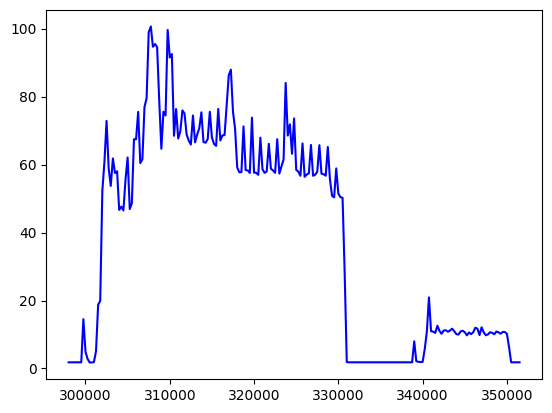

In [33]:
plt.plot(df_agrupado['tempo'], df_agrupado['pa'], label='PA', color='blue')

In [32]:
rec = pd.read_csv('reconhecimento1.csv',sep=' - ')
rec['tipo'] = rec.apply(lambda x:1 if '1' in x['evento'] else 2 if '2' in x['evento'] else 3 if '3' in x['evento'] else 4 if '4' in x['evento'] else 0, axis=1)
# Cores por tipo
cores = {
    0: 'gray',
    1: 'red',
    2: 'green',
    3: 'orange',
    4: 'purple'
}

# Criando figura
fig = go.Figure()

# Curva de potência
fig.add_trace(go.Scatter(
    x=df_agrupado['tempo'],
    y=df_agrupado['pa'],
    mode='lines',
    name='PA',
    line=dict(color='blue')
))

# Barras verticais por tipo
for tipo, cor in cores.items():
    sub = rec[rec['tipo'] == tipo]
    for tempo in sub['tempo']:
        fig.add_trace(go.Scatter(
            x=[tempo, tempo],
            y=[df_agrupado['pa'].min(), df_agrupado['pa'].max()],
            mode='lines',
            line=dict(color=cor, dash='dash', width=1),
            name=f'Tipo {tipo}',
            showlegend=False  # Evita duplicar legenda
        ))

# Legenda personalizada
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='gray'), name='OFF'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='red'), name='Tipo 1'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='green'), name='Tipo 2'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='orange'), name='Tipo 3'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='purple'), name='Tipo 4'))

# Layout
fig.update_layout(
    title='Reconhecimento de Eventos na Curva de Potência',
    xaxis_title='Tempo (s)',
    yaxis_title='Potência Ativa (W)',
    template='plotly_white',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()

C:\Users\joaop\AppData\Local\Temp\ipykernel_6888\3685305942.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

